<a href="https://colab.research.google.com/github/Boamah-Powers/ml-learning/blob/main/multi_class_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import relevant modules

In [3]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when outputting NumPy arrays
np.set_printoptions(linewidth = 200)

## Loading dataset

In [4]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Viewing data

In [ ]:
# Using false colors to visualize the array
plt.imshow(x_train[2917])

In [ ]:
# Output example #2917 of the training set
x_train[2917]

## Normalizing feature values

In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][10]) # Output a normalized row

## Defining a plotting function

In [8]:
def plot_curve(epochs, hist, list_of_metrics):
  """ Plot a curve of one or more classification metrics vs epoch """

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function")

Loaded the plot_curve function


## Create a deep neural net model

In [20]:
# Define the topography of the deep neural net
def create_model(my_learning_rate):
  """ Create and compile a deep neural net """

  model = tf.keras.models.Sequential()

  # Flatten two dimensional array into a one-dimensional
  # array
  model.add(tf.keras.layers.Flatten(
      input_shape=(28,28),
  ))

  # Define the first hidden layer
  model.add(tf.keras.layers.Dense(
      units=256,
      activation='relu',
  ))

  # Define the second hidden layer
  model.add(tf.keras.layers.Dense(
      units=128,
      activation='relu',
  ))

  # Define a dropout regularization layer
  model.add(tf.keras.layers.Dropout(
      rate=0.3,
  ))


  # Define an output layer. The units parameter is set to
  # 10 because the model must choose among 10 possible output values
  model.add(tf.keras.layers.Dense(
      units=10,
      activation='softmax',
  ))

  # Construct the layers into a model that TensorFlow can execute
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
      loss="sparse_categorical_crossentropy",
      metrics=['accuracy'],
  )

  return model


def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
  """ Train the model by feeding it data """

  history = model.fit(
      x=train_features,
      y=train_label,
      batch_size=batch_size,
      epochs=epochs,
      shuffle=True,
      validation_split=validation_split,
  )

  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

## Training the model

Epoch 1/50
12/12 [==============================] - 2s 128ms/step - loss: 1.0676 - accuracy: 0.6798 - val_loss: 0.3579 - val_accuracy: 0.8946
Epoch 2/50
12/12 [==============================] - 1s 104ms/step - loss: 0.3764 - accuracy: 0.8883 - val_loss: 0.2511 - val_accuracy: 0.9283
Epoch 3/50
12/12 [==============================] - 1s 102ms/step - loss: 0.2657 - accuracy: 0.9218 - val_loss: 0.1919 - val_accuracy: 0.9437
Epoch 4/50
12/12 [==============================] - 1s 103ms/step - loss: 0.2080 - accuracy: 0.9391 - val_loss: 0.1597 - val_accuracy: 0.9542
Epoch 5/50
12/12 [==============================] - 1s 103ms/step - loss: 0.1702 - accuracy: 0.9492 - val_loss: 0.1412 - val_accuracy: 0.9592
Epoch 6/50
12/12 [==============================] - 2s 146ms/step - loss: 0.1467 - accuracy: 0.9558 - val_loss: 0.1275 - val_accuracy: 0.9632
Epoch 7/50
12/12 [==============================] - 2s 157ms/step - loss: 0.1241 - accuracy: 0.9633 - val_loss: 0.1148 - val_accuracy: 0.9660
Epoch 

[0.08420319110155106, 0.9804999828338623]

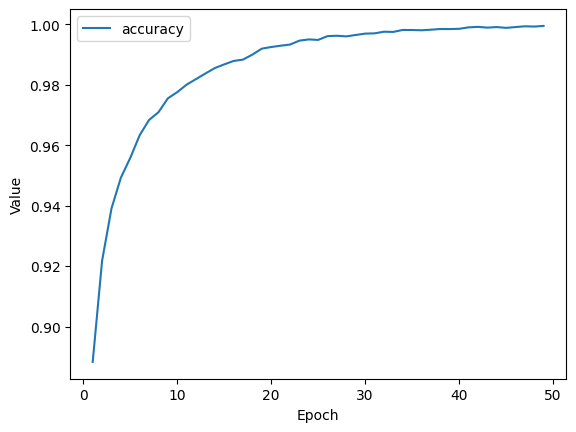

In [21]:
# The following variables are the hyperparameters
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography
my_model = create_model(learning_rate)

# Train the model on the normalized training set
epochs, hist = train_model(
    my_model,
    x_train_normalized,
    y_train,
    epochs,
    batch_size,
    validation_split,
)

# Plot a graph of the metric vs epochs
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set
print("\n Evaluate the new model against the test set: ")
my_model.evaluate(
    x=x_test_normalized,
    y=y_test,
    batch_size=batch_size,
)